# 'Kwanza Tukule' Sales Data Analysis and Insights.
*By Muniu Paul ™️*

## 1. Business Understanding.
### Overview.
Kwanza Tukule is a cashless B2B business that leverages technology and an efficient supply chain to ensure accessible and affordable nutritious food for the many in Kenya. By focusing on street food vendors and kiosks, which serve as critical food access points in low-income areas, Kwanza Tukule addresses the challenges of affordability and availability of ingredients. The company sources essential products directly from manufacturers and delivers them through last-mile distribution, cutting out intermediaries and offering products at affordable rates to vendors, thus reducing food costs for the local population.

### Problem Statement.
This project aims to analyze anonymized sales data to derive actionable insights that will help Kwanza Tukule optimize its operations, better serve its vendors, and improve access to affordable food. The insights will focus on understanding sales trends, customer behavior, and inventory management to inform business decisions.

### Objectives.
1. Data Cleaning and Preparation: Cleaning and preparing the dataset.
2. Sales Analysis: Analyzing trends and performance to understand the business context.
3. Forecasting and Segmentation: Performing advanced analysis like forecasting and customer segmentation.
4. Recommendations: Providing actionable recommendations to improve operations.
5. Dashboard Creation: Creating an interactive dashboard that summarizes your findings.

### Stakeholder : 
**Kwanza Tukule Foods Limited** - A B2B company focused on providing accessible, affordable, and nutritious food to street food vendors and kiosks in low-income areas of Kenya.

# 2. Data Understanding.
The dataset provided by **Kwanza Tukule** contains anonymized sales data. You can access it [here](dataset/Case%20Study%20Data%20-%20Read%20Only%20-%20case_study_data_2025-01-16T06_49_12.19881Z.csv).

##### Importing packages/libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [9]:
# check the first 5 rows
data = pd.read_csv('dataset/Case Study Data.csv')
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,"August 18, 2024, 9:32 PM",Category-106,Product-21f4,Business-de42,Location-1ba8,1,850
1,"August 18, 2024, 9:32 PM",Category-120,Product-4156,Business-de42,Location-1ba8,2,"1,910"
2,"August 18, 2024, 9:32 PM",Category-121,Product-49bd,Business-de42,Location-1ba8,1,"3,670"
3,"August 18, 2024, 9:32 PM",Category-76,Product-61dd,Business-de42,Location-1ba8,1,"2,605"
4,"August 18, 2024, 9:32 PM",Category-119,Product-66e0,Business-de42,Location-1ba8,5,"1,480"


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333405 entries, 0 to 333404
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   DATE                 333405 non-null  object
 1   ANONYMIZED CATEGORY  333405 non-null  object
 2   ANONYMIZED PRODUCT   333405 non-null  object
 3   ANONYMIZED BUSINESS  333405 non-null  object
 4   ANONYMIZED LOCATION  333405 non-null  object
 5   QUANTITY             333405 non-null  int64 
 6   UNIT PRICE           333397 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


The dataset consists of 333,405 rows and 7 columns. The features include:

`DATE`: The date of the transaction.

`ANONYMIZED CATEGORY`: The category of the product sold.

`ANONYMIZED PRODUCT`: The specific product that was sold.

`ANONYMIZED BUSINESS`: The business that made the sale.

`ANONYMIZED LOCATION`: The location of the transaction.

`QUANTITY`: The number of units sold in the transaction.

`UNIT PRICE`: The price per unit of the product.

# SECTION 1: Data Cleaning and Preparation.

## (a) Data Quality Assessment.

#### i. Check for missing values

In [23]:
missing_values = data.isnull().sum()
missing_values

DATE                        0
ANONYMIZED CATEGORY         0
ANONYMIZED PRODUCT          0
ANONYMIZED BUSINESS         0
ANONYMIZED LOCATION         0
QUANTITY                    0
UNIT PRICE             275299
dtype: int64

- Action Taken.

Given that the rest of the dataset had no missing values, I decided to drop the rows with missing values in the 'UNIT PRICE' column to avoid introducing bias into the analysis.

In [24]:
data.dropna(subset=['UNIT PRICE'], inplace=True)

In [25]:
# Verify that no missing values remain
missing_values_after = data.isnull().sum()
missing_values_after


DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

#### ii. Check dublicates



In [26]:
data.duplicated().sum()

0

- Action Taken:

Discovered that 3,524 duplicate rows are present. Duplicate rows can skew analysis and lead to inaccurate insights, so it was essential to address this issue by dropping them.

In [27]:
data.drop_duplicates(inplace=True)

In [28]:
# countercheck duplicates
data.duplicated().sum()

0

### iii. check for inconsistent data types.

In [29]:
data.dtypes

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object

- Action Taken

Upon inspecting the data types:
The DATE column is stored as an object but should be converted to a datetime format and the UNIT PRICE column is stored as an object this needs to be converted to a numeric format (float).

In [30]:
# convert the date column to datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

#convert the Unit Price column to float
data['UNIT PRICE'] = pd.to_numeric(data['UNIT PRICE'], errors='coerce')

In [31]:
# Counterccheck the data types
data.dtypes

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object

## (b) Feature Engineering.
- Creating the "Month-Year" Column.

This part involves creating a new column called Month-Year. We'll extract the month and year from the DATE column.

In [32]:
# Create 'Month-Year' column
data['Month-Year'] = data['DATE'].dt.strftime('%B %Y')

In [35]:
# Check the new column
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024
8,2024-08-18 21:32:00,Category-96,Product-87b2,Business-de42,Location-1ba8,1,805.0,August 2024
14,2024-11-25 16:42:00,Category-82,Product-91f3,Business-aab8,Location-128a,1,815.0,November 2024
16,2024-11-25 16:42:00,Category-78,Product-b409,Business-aab8,Location-128a,1,750.0,November 2024
24,2024-05-23 20:22:00,Category-91,Product-32b3,Business-22a2,Location-c2f2,3,640.0,May 2024


## (c) Data Validation.
This involves verifying if the data values make sense in the context of your project

Outliers Detection
Using boxplots and  to identify unusually high or low values.

In [61]:
data.describe()

,DATE,QUANTITY,UNIT PRICE
count,54574,54574.000000,54574.000000
mean,2024-08-09 18:50:59.460182272,1.796753,588.328930
min,2024-01-01 10:45:00,0.000000,0.000000
25%,2024-05-22 08:39:00,1.000000,365.000000
50%,2024-09-04 19:40:00,1.000000,663.000000
75%,2024-11-01 21:21:00,2.000000,814.000000
max,2024-12-31 18:22:00,80.000000,995.000000
std,NaN,2.309987,254.176147


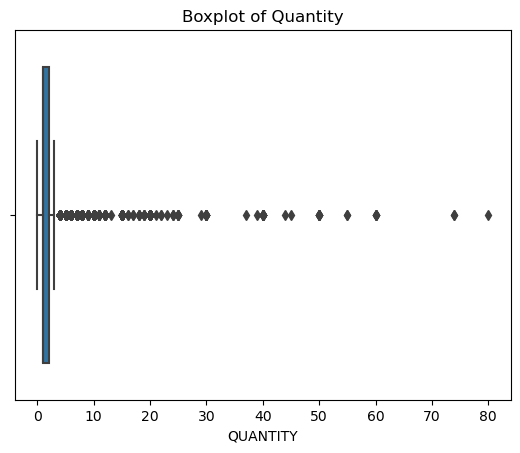

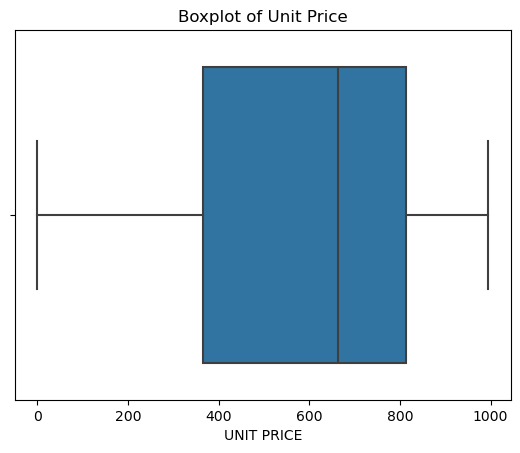

In [62]:

# Check for outliers in QUANTITY
sns.boxplot(x=data['QUANTITY'])
plt.title('Boxplot of Quantity')
plt.show()

# Check for outliers in UNIT PRICE
sns.boxplot(x=data['UNIT PRICE'])
plt.title('Boxplot of Unit Price')
plt.show()

- Action Taken
No outliers were removed, as they represent valid observations and provide valuable insights into the dataset's range and variability.

 Date Validation
Verify the DATE column has valid entries and ensure they fall within a reasonable range

In [63]:
# Check for invalid dates
print(f"Min date: {data['DATE'].min()}, Max date: {data['DATE'].max()}")

Min date: 2024-01-01 10:45:00, Max date: 2024-12-31 18:22:00


Consistency in Categorical Data
To ensure consistency across the dataset, we created a function that standardizes specified columns by removing extra spaces and converting text to lowercase. This is applied to the following columns: 

&#10003; ANONYMIZED CATEGORY 

&#10003; ANONYMIZED PRODUCT 

&#10003; ANONYMIZED BUSINESS

&#10003; ANONYMIZED LOCATION

In [64]:
def clean_column(df, columns):
    """
    Cleans and standardizes specified columns in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the columns to clean.
    columns (list): A list of column names to clean.
    
    Returns:
    pd.DataFrame: The DataFrame with cleaned columns.
    """
    for col in columns:
        df[col] = df[col].str.strip().str.lower()
    return df

columns_to_clean = ['ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT', 'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION']
df = clean_column(data, columns_to_clean)
data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
0,2024-08-18 21:32:00,category-106,product-21f4,business-de42,location-1ba8,1,850.0,August 2024
8,2024-08-18 21:32:00,category-96,product-87b2,business-de42,location-1ba8,1,805.0,August 2024
14,2024-11-25 16:42:00,category-82,product-91f3,business-aab8,location-128a,1,815.0,November 2024
16,2024-11-25 16:42:00,category-78,product-b409,business-aab8,location-128a,1,750.0,November 2024
24,2024-05-23 20:22:00,category-91,product-32b3,business-22a2,location-c2f2,3,640.0,May 2024


&#10003; This is a tick mark